Code for exploring the biomarker phenotype distributions.


Goals:
- Look at sex + age differences in these distributiosn
- Look at pre- vs post- menopause differences
- Look at menstrual cycle differences
- Look at hormone levels (T, E, etc)
- Check on whether there is data related to E, T, other hormone meds

In [1]:
require('tidyverse')

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.1     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# read in pheno matrix

biomarker_phe <- read.delim("/oak/stanford/groups/mrivas/projects/biomarkers/covariate_corrected/phenotypes/raw/biomarkers_serum_full.phe")



In [3]:
# only want the data from the FIRST visit
list_cols <- colnames(biomarker_phe)
visit_zero <- sapply(list_cols[2:ncol(biomarker_phe)], function(x) strsplit(x, ".", fixed=TRUE)[[1]][[3]]==0)
table(visit_zero)
biomarker_phe2 <- biomarker_phe[,list_cols[c(TRUE, visit_zero)]]
dim(biomarker_phe2)
# could look at second visit later
head(biomarker_phe2)

visit_zero
FALSE  TRUE 
  209   209 

[1] 502536    210

f.eid,f.30600.0.0,f.30601.0.0,f.30602.0.0,f.30603.0.0,f.30604.0.0,f.30605.0.0,f.30606.0.0,f.30610.0.0,f.30611.0.0,⋯,f.30884.0.0,f.30885.0.0,f.30886.0.0,f.30890.0.0,f.30891.0.0,f.30892.0.0,f.30893.0.0,f.30894.0.0,f.30895.0.0,f.30896.0.0
5586147,NA,2017-05-22,1,NA,NA,8,NA,114.3,2017-05-22,⋯,0,NA,1,67.8,2017-05-21,1,0,0,NA,1
5144865,NA,2017-09-01,2,NA,NA,8,NA,59.6,2017-09-01,⋯,0,NA,1,26.2,2017-09-01,2,0,0,NA,1
2845962,46.07,2017-07-04,1,1,0,NA,1,83.4,2017-07-04,⋯,0,NA,1,56.6,2017-07-02,1,0,0,NA,1
3390045,47.45,2017-03-13,1,1,0,NA,1,41.4,2017-03-12,⋯,0,NA,1,77.8,2017-03-11,1,0,0,NA,1
4264965,45.75,2017-02-06,1,1,0,NA,1,61.1,2017-02-06,⋯,0,NA,1,12.1,2017-02-06,1,0,0,NA,1
3131746,49.71,2016-10-26,1,1,0,NA,1,108.5,2016-10-26,⋯,0,NA,1,58.9,2016-10-26,1,0,0,NA,1


In [17]:
biomarker <- read.table("../phe_extraction/list_biomarker.txt", header=TRUE)
rownames(biomarker) <- biomarker$Field

In [ ]:
red_cols <- sapply(colnames(biomarker_phe2)[2:ncol(biomarker_phe2)], function(x) strsplit(x, ".", fixed=TRUE)[[1]][[2]])
colnames(biomarker_phe2) <- c("f.eid", red_cols)
direct_measurements <- (red_cols %in% biomarker$Field)
biomarker_phe3 <- biomarker_phe2[,colnames(biomarker_phe2)[c(TRUE, direct_measurements)]]

In [20]:
write.table(biomarker_phe3, file="../phe_extraction/sm_biomarker_tab.txt", row.names=FALSE) #TODO - change to fread

In [21]:
# write all of these out as phe files - SLOW
biomarker_df <- read.table("../phe_extraction/sm_biomarker_tab.txt", header=TRUE)
PHE_OUT_DIR <- '/scratch/PI/mrivas/users/erflynn/sex_div_gwas/phefiles'

write_out_phe <- function(phe_id){
    df_phe <- biomarker_df[,c("f.eid", phe_id)]  # structured as phe, visit, info, we want visit 1
    df_phe2 <- cbind(df_phe[,"f.eid"], df_phe)
    write.table(df_phe2, file=sprintf("%s/%s.phe", PHE_OUT_DIR, phe_id), row.names=FALSE, quote=FALSE, col.names=FALSE, sep="\t")
}

sapply(biomarker$Field, write_out_phe)

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

[[16]]
NULL

[[17]]
NULL

[[18]]
NULL

[[19]]
NULL

[[20]]
NULL

[[21]]
NULL

[[22]]
NULL

[[23]]
NULL

[[24]]
NULL

[[25]]
NULL

[[26]]
NULL

[[27]]
NULL

[[28]]
NULL

[[29]]
NULL

[[30]]
NULL

In [5]:
# read in covariate data
COVARIATE_MATRIX <- '/oak/stanford/groups/mrivas/ukbb24983/sqc/ukb24983_GWAS_covar.phe'
cov_mat <- read.table(COVARIATE_MATRIX, header=TRUE)
cov_mat_sm <- cov_mat[,c("IID","age", "sex")]



In [6]:
# Filter out 151k sqc individuals
removal_file_one <- '/oak/stanford/groups/mrivas/ukbb/24983/sqc/ukb24983_remove.phe'
removal_file_two <- '/oak/stanford/groups/mrivas/ukbb/24983/sqc/w24983_20181016.csv'
remove1 <- read.table(removal_file_one, header=FALSE)
remove2 <- read.table(removal_file_two, header=FALSE) 
ids.to.remove <- c(remove1[,1], unique(remove2[,1]))
cov_mat_filt <- cov_mat_sm[!(cov_mat_sm$IID %in% ids.to.remove),]

In [7]:
head(cov_mat_filt)
combined_mat <- left_join(cov_mat_filt, biomarker_phe3, by=c("IID"="f.eid"))

,IID,age,sex
1,2502845,50,1
2,2314965,55,0
3,1142584,60,0
4,3665122,74,0
5,4377492,65,0
7,4015997,50,0


In [8]:
# SS factors
# menopause: 2724
# age at menopause: 3581
# menopause phenotype
#  - Pre-menopause: stated they have not reached menopause -AND- are less than 60 years old
#  - Post-menopause: >2 years post menopause -AND- had menopause after age 40
#  - Peri-menopause: w/in 2y menopause
#  - Premature_menopause: menopause after age 40
#  - Unknown: no info, or greater than 60y and says that not reached menopause

meno_age <- read.table("../data/menopause_age_data_pheno.txt", header=TRUE )

In [9]:
# period timing
# time since last period: 3700
# length of menstrual cycle: 3710
# menstruating today: 3720

cycle_dat <- read.table("../data/menstrual_phase.txt", header=TRUE)

In [10]:
head(meno_age)

IID,meno,meno.age,age,sex,years.post,meno.label
1000010,NA,NA,NA,NA,NA,missing
1000028,FALSE,NA,54,0,NA,pre
1000034,NA,NA,68,1,NA,male
1000045,TRUE,54,79,0,25,post
1000052,TRUE,NA,72,0,NA,missing_age
1000069,TRUE,50,75,0,25,post


In [11]:
combined2 <- left_join(combined_mat, select(meno_age, c("IID", "meno.label")), by="IID")#by=c("IID"="ID"))

In [12]:
combined3 <- left_join(combined2, select(cycle_dat, c("ID", "phase")), by=c("IID"="ID"))

In [13]:
combined3.2 <- combined3 %>% select(IID, age, sex, meno.label, phase, everything())
head(combined3.2[,1:7])


IID,age,sex,meno.label,phase,f.30600.0.0,f.30610.0.0
2502845,50,1,male,NA,45.64,55.3
2314965,55,0,missing,NA,NA,49.5
1142584,60,0,post,NA,47.06,176.2
3665122,74,0,post,NA,47.47,62.7
4377492,65,0,post,NA,48.13,88.0
4015997,50,0,pre,menstrual,45.92,74.9


In [14]:
require('reshape2')
dat.melted <- melt(combined3.2, id.vars=c("IID", "age", "sex", "meno.label", "phase"))
head(dat.melted)

Loading required package: reshape2

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



IID,age,sex,meno.label,phase,variable,value
2502845,50,1,male,NA,f.30600.0.0,45.64
2314965,55,0,missing,NA,f.30600.0.0,NA
1142584,60,0,post,NA,f.30600.0.0,47.06
3665122,74,0,post,NA,f.30600.0.0,47.47
4377492,65,0,post,NA,f.30600.0.0,48.13
4015997,50,0,pre,menstrual,f.30600.0.0,45.92


In [16]:

dat2 <- dat.melted %>% filter(!is.na(value))

    

,Field,ID,X,Description,name
30620,30620,Alanine,aminotransferase,,Alanine aminotransferase
30600,30600,Albumin,,,Albumin
30610,30610,Alkaline,phosphatase,,Alkaline phosphatase
30630,30630,Apolipoprotein,A,,Apolipoprotein A
30640,30640,Apolipoprotein,B,,Apolipoprotein B
30650,30650,Aspartate,aminotransferase,,Aspartate aminotransferase


In [17]:
# group means for sex
group_means <- dat2 %>% group_by(sex, variable) %>% summarize(mean_val=mean(value),sd_val=sd(value))
head(group_means) 
group_means$sex <- as.factor(group_means$sex)
group_means$variable2 <- sapply(group_means$variable, function(x) strsplit(as.character(x), ".", fixed=TRUE)[[1]][[2]])
group_means$name <- biomarker[group_means$variable2,]$name

sex,variable,mean_val,sd_val
0,f.30600.0.0,44.985997,2.5861501
0,f.30610.0.0,84.985266,27.7202035
0,f.30620.0.0,20.266769,12.1533011
0,f.30630.0.0,1.638494,0.2663518
0,f.30640.0.0,1.040757,0.2380158
0,f.30650.0.0,24.493638,9.5252283


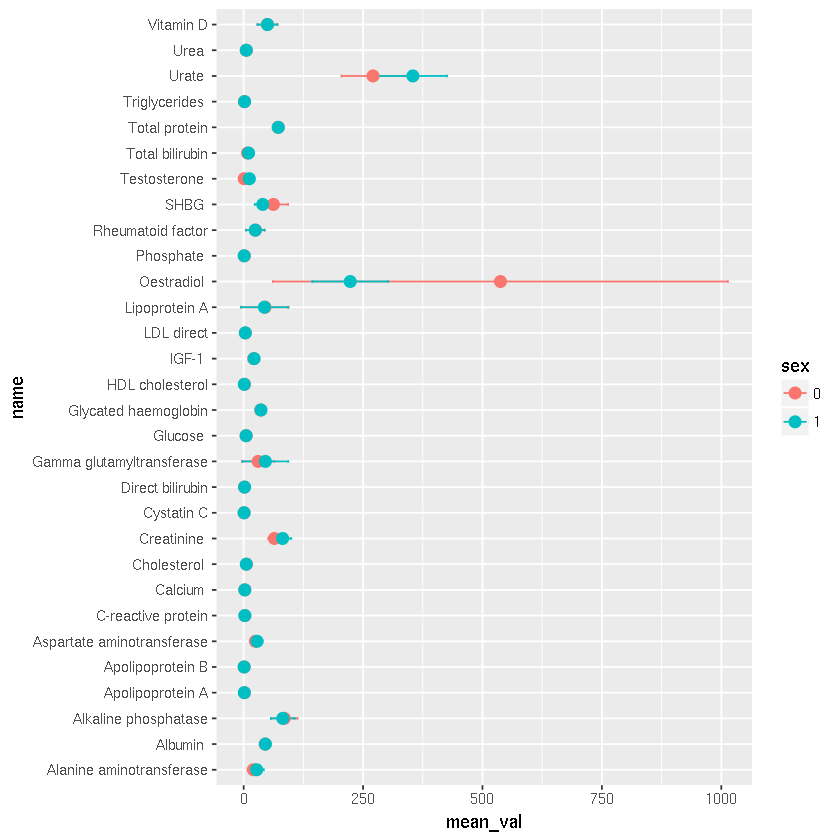

In [18]:
ggplot(group_means, aes(x=name, y=mean_val, colour=sex )) +
       geom_errorbar(aes(ymin=mean_val-sd_val, ymax=mean_val+sd_val), width=0.1)+
geom_point(size=3) + coord_flip()

# TODO - facet data


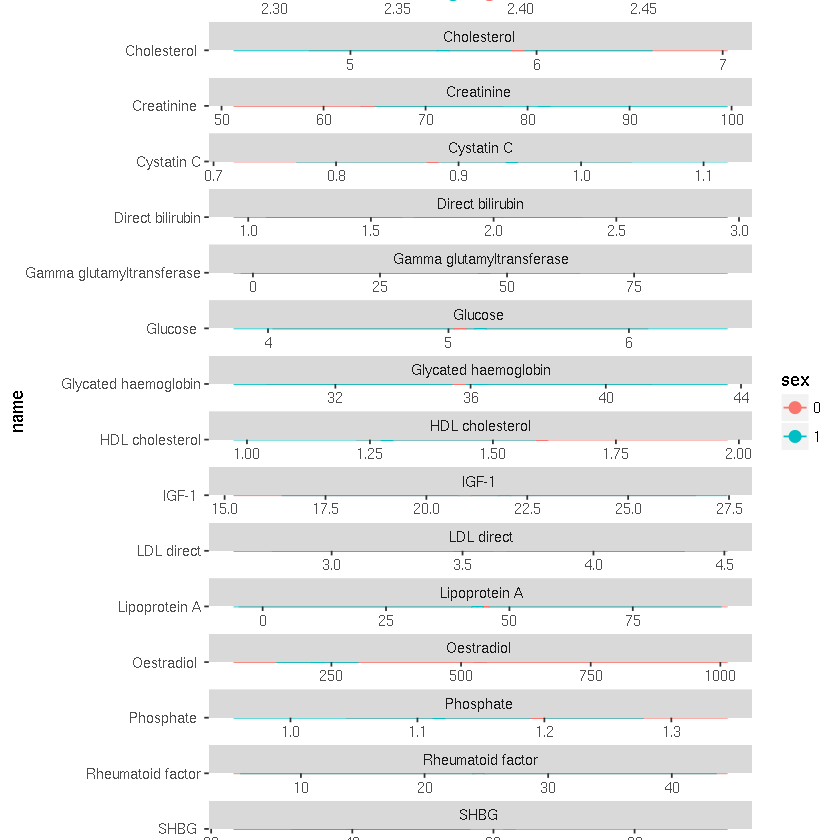

In [20]:
ggplot(group_means, aes(x=name, y=mean_val, colour=sex )) +
       geom_errorbar(aes(ymin=mean_val-sd_val, ymax=mean_val+sd_val), width=0.1)+
geom_point(size=3) + coord_flip()+facet_wrap(~name, ncol=1, scales="free") # FIX

meno.label,variable,mean_val,sd_val
male,f.30600.0.0,45.527425,2.6088648
male,f.30610.0.0,81.985183,24.8487043
male,f.30620.0.0,27.292527,14.9984962
male,f.30630.0.0,1.432713,0.2299103
male,f.30640.0.0,1.027883,0.2383504
male,f.30650.0.0,28.156607,11.3961713


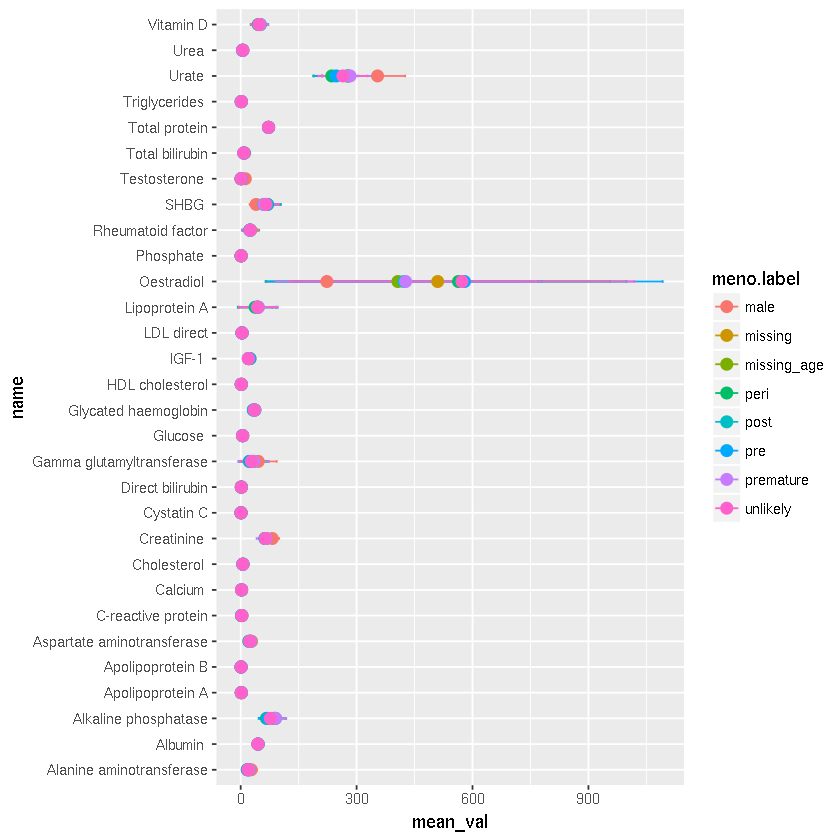

In [22]:
# summarize by menopausal status
group_means <- dat2 %>% group_by( meno.label, variable) %>% summarize(mean_val=mean(value),sd_val=sd(value))
head(group_means) 
group_means$variable2 <- sapply(group_means$variable, function(x) strsplit(as.character(x), ".", fixed=TRUE)[[1]][[2]])
group_means$name <- biomarker[group_means$variable2,]$name
ggplot(group_means, aes(x=name, y=mean_val, colour=meno.label )) +
       geom_errorbar(aes(ymin=mean_val-sd_val, ymax=mean_val+sd_val), width=0.1)+
geom_point(size=3) + coord_flip()


In [ ]:
# age last used HRT: 3546
# age started HRT: 3536
# age last used bc pill: 2804
# age started bc pill: 2794

# data field 20003 has treatment/medication code
# "testosterone product", "testogel"
# many on estrogen products